In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as plyo
import sys
import cufflinks as cf
plyo.init_notebook_mode(connected=True)
import math
import scipy.optimize as sco

d:\PROGRAMMING\anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\PROGRAMMING\anaconda\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
d:\PROGRAMMING\anaconda\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
d:\PROGRAMMING\anaconda\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



In [2]:
def get_data(symbol):
    df = pd.read_csv("{}".format(symbol),index_col="Date",parse_dates=True)
    return df['Close']

def port_ret(weights,returns):
    return np.sum(returns.mean()*weights)*252

def port_vol(weights,returns):
    return np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights)))


def sharpe_ratio(weights,returns):
    return -port_ret(weights,returns)/port_vol(weights,returns)


def normalize(df):
    return df/df.iloc[0]
    

In [3]:
for symbol in ['AAPL.csv','AMZN.csv','GOOG.csv','META.csv','NFLX.csv']:
    if symbol == 'AAPL.csv':
        d1 = get_data(symbol)
    elif symbol == 'AMZN.csv':
        d2 = get_data(symbol)
    elif symbol == 'GOOG.csv':
        d3 = get_data(symbol)
    elif symbol == 'META.csv':
        d4 = get_data(symbol)
    elif symbol == 'NFLX.csv':
        d5 = get_data(symbol) 

dict = {'AAPL':d1,
        'AMZN':d2,
        'GOOGL':d3,
        'META':d4,
        'NFLX':d4}
df0 = pd.DataFrame(dict)
df0['AAPL'] = pd.to_numeric(df0['AAPL'])
df0['AMZN'] = pd.to_numeric(df0['AMZN'])
df0['GOOGL'] = pd.to_numeric(df0['GOOGL'])
df0['META'] = pd.to_numeric(df0['META'])
df0['NFLX'] = pd.to_numeric(df0['NFLX'])

spy = pd.read_csv('SPY.csv',index_col="Date",parse_dates=True)
spy


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-23,285.970001,286.940002,285.429993,285.790009,262.645325,49204900
2018-08-24,286.440002,287.670013,286.380005,287.510010,264.226135,57487400
2018-08-27,288.859985,289.899994,288.679993,289.779999,266.312256,57072400
2018-08-28,290.299988,290.420013,289.399994,289.920013,266.441040,46943500
2018-08-29,290.160004,291.739990,289.890015,291.480011,267.874603,61485500
...,...,...,...,...,...,...
2023-08-16,442.459991,444.179993,439.529999,439.640015,439.640015,80107200
2023-08-17,441.160004,441.429993,435.750000,436.290009,436.290009,95711300
2023-08-18,433.369995,437.570007,433.010010,436.500000,436.500000,98758400


In [4]:
import statsmodels as sm
from statsmodels.tsa.vector_ar.vecm import coint_johansen
log_prices = np.log(df0)
stocks=df0.columns
#j = np.column_stack((x,y,z,a,b))
#run the test
jr = coint_johansen(log_prices[[stocks[0],stocks[1],stocks[2],stocks[3]]],det_order=0,k_ar_diff=1)

In [5]:
j_ei = jr.eig
j_evec = jr.evec

j_ei


array([0.00922931, 0.00600513, 0.00368826, 0.0008084 ])

In [6]:
print("Johansen MLE estimates")
print("NULL:\t\t\tTrace Statistic\tCrit 90%\tCrit 95%\tCrit 99%")
print(f"r <= 0\tvariable 1\t{jr.lr1[0]}\t\t{jr.cvt[0, 0]}\t\t{jr.cvt[0, 1]}\t\t{jr.cvt[0, 2]}")
print(f"r <= 1\tvariable 2\t{jr.lr1[1]}\t\t{jr.cvt[1, 0]}\t\t{jr.cvt[1, 1]}\t\t{jr.cvt[1, 2]}\n")
print(f"r <= 2\tvariable 3\t{jr.lr1[2]}\t\t{jr.cvt[2, 0]}\t\t{jr.cvt[2, 1]}\t\t{jr.cvt[2, 2]}")
print(f"r <= 3\tvariable 4\t{jr.lr1[3]}\t\t{jr.cvt[3, 0]}\t\t{jr.cvt[3, 1]}\t\t{jr.cvt[3, 2]}\n")
print("NULL:\t\t\tEigen Statistic\tCrit 90%\tCrit 95%\tCrit 99%")
print(f"r <= 0\tvariable 1\t{jr.lr2[0]}\t\t{jr.cvm[0, 0]}\t\t{jr.cvm[0, 1]}\t\t{jr.cvm[0, 2]}")
print(f"r <= 1\tvariable 2\t{jr.lr2[1]}\t\t{jr.cvm[1, 0]}\t\t{jr.cvm[1, 1]}\t\t{jr.cvm[1, 2]}\n")
print(f"r <= 2\tvariable 3\t{jr.lr2[2]}\t\t{jr.cvm[2, 0]}\t\t{jr.cvm[2, 1]}\t\t{jr.cvm[2, 2]}")
print(f"r <= 3\tvariable 4\t{jr.lr2[3]}\t\t{jr.cvm[3, 0]}\t\t{jr.cvm[3, 1]}\t\t{jr.cvm[3, 2]}\n")

Johansen MLE estimates
NULL:			Trace Statistic	Crit 90%	Crit 95%	Crit 99%
r <= 0	variable 1	24.84800105774523		44.4929		47.8545		54.6815
r <= 1	variable 2	13.21143419132024		27.0669		29.7961		35.4628

r <= 2	variable 3	5.652274316776315		13.4294		15.4943		19.9349
r <= 3	variable 4	1.0149564632290937		2.7055		3.8415		6.6349

NULL:			Eigen Statistic	Crit 90%	Crit 95%	Crit 99%
r <= 0	variable 1	11.636566866424985		25.1236		27.5858		32.7172
r <= 1	variable 2	7.5591598745439255		18.8928		21.1314		25.865

r <= 2	variable 3	4.637317853547221		12.2971		14.2639		18.52
r <= 3	variable 4	1.0149564632290937		2.7055		3.8415		6.6349



In [7]:
jr.lr2>jr.cvm[:,-2]

array([False, False, False, False])

In [8]:

ret_spy = np.log(spy['Adj Close']/spy['Adj Close'].shift(1))
ret_spy

Date
2018-08-23         NaN
2018-08-24    0.006001
2018-08-27    0.007864
2018-08-28    0.000483
2018-08-29    0.005366
                ...   
2023-08-16   -0.007365
2023-08-17   -0.007649
2023-08-18    0.000481
2023-08-21    0.006485
2023-08-22   -0.002712
Name: Adj Close, Length: 1257, dtype: float64

,AAPL,AMZN,GOOGL,META,NFLX
Date,,,,,
2018-08-23,NaN,NaN,NaN,NaN,NaN
2018-08-24,0.003104,0.001308,0.012589,0.010071,0.010071
2018-08-27,0.008201,0.011631,0.017195,0.015961,0.015961
2018-08-28,0.008043,0.002663,-0.008629,-0.006785,-0.006785
2018-08-29,0.014819,0.033217,0.014635,-0.002045,-0.002045
...,...,...,...,...,...
2023-08-16,-0.004971,-0.019066,-0.008944,-0.025696,-0.025696
2023-08-17,-0.014662,-0.008103,0.010402,-0.031761,-0.031761
2023-08-18,0.002812,-0.005689,-0.018177,-0.006475,-0.006475


C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\matplotlib\_tight_bbox.py:64: RuntimeWarning:

divide by zero encountered in scalar divide

C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\matplotlib\_tight_bbox.py:65: RuntimeWarning:

divide by zero encountered in scalar divide

C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\matplotlib\patches.py:739: RuntimeWarning:

invalid value encountered in scalar add

C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\matplotlib\transforms.py:2042: RuntimeWarning:

invalid value encountered in scalar add



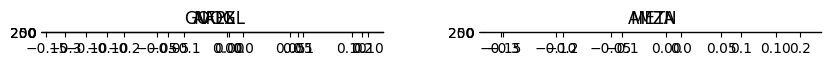

In [9]:
returns = np.log(df0/df0.shift(1))
returns.hist(bins=40,figsize=(10,0))

returns

In [10]:
returns.mean()*252

AAPL     0.238924
AMZN     0.069080
GOOGL    0.153754
META     0.102096
NFLX     0.102096
dtype: float64

In [11]:
returns.cov()*252

,AAPL,AMZN,GOOGL,META,NFLX
AAPL,0.111088,0.078477,0.073818,0.087735,0.087735
AMZN,0.078477,0.134770,0.080567,0.100761,0.100761
GOOGL,0.073818,0.080567,0.103263,0.096699,0.096699
META,0.087735,0.100761,0.096699,0.201086,0.201086
NFLX,0.087735,0.100761,0.096699,0.201086,0.201086


In [12]:
weights=np.random.random(5)
weights /= np.sum(weights)

weights

array([0.39810518, 0.24474542, 0.15567591, 0.17798697, 0.02348652])

In [13]:
#expected ann portfolio return 

np.sum(returns.mean() *weights) *252

0.1565291885061946

In [14]:
math.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights)))

0.31145260722407553

In [15]:
prets = []
pvol = []

for p in range(2500):
    alloc = np.random.random(5)
    alloc /= np.sum(alloc)
    prets.append(port_ret(alloc,returns))
    pvol.append(port_vol(alloc,returns))
prets = np.array(prets)
pvol = np.array(pvol)



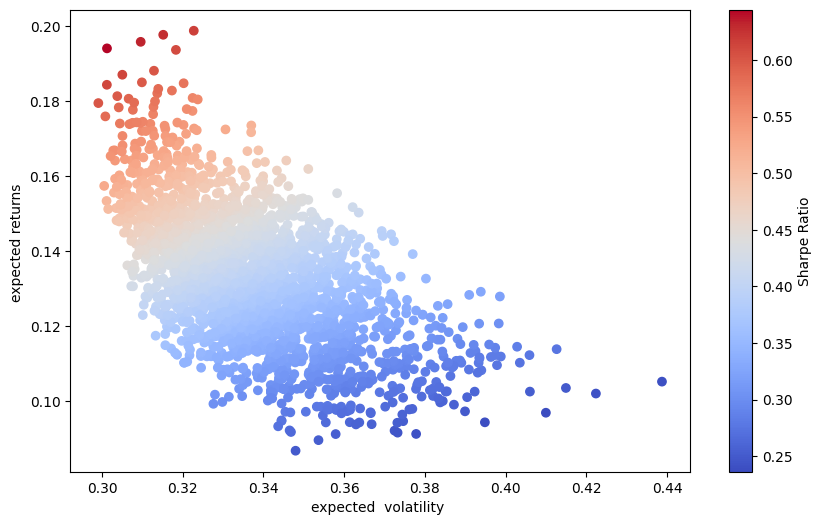

In [16]:
plt.figure(figsize=(10,6))

plt.scatter(pvol,prets,c=prets/pvol,marker='o',cmap='coolwarm')
plt.xlabel('expected  volatility ')
plt.ylabel('expected returns ')
plt.colorbar(label='Sharpe Ratio')

In [17]:
constraints = ({'type':'eq','fun':lambda x:np.sum(x) - 1})

boundaries = tuple((0,1)for x in range(5))

eweights = np.array(5*[1. /5,])


opts = sco.minimize(sharpe_ratio,eweights,returns,method='SLSQP',bounds=boundaries,constraints=constraints)

In [18]:
opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.7168463502957271
       x: [ 1.000e+00  0.000e+00  2.776e-17  2.134e-16  7.980e-17]
     nit: 5
     jac: [-7.451e-09  2.991e-01  1.504e-02  2.598e-01  2.598e-01]
    nfev: 30
    njev: 5

In [19]:
optimal_weights = opts['x']

optimal_weights

array([1.00000000e+00, 0.00000000e+00, 2.77555756e-17, 2.13370988e-16,
       7.97972799e-17])

In [20]:
port_vol(opts['x'].round(3),returns)

0.3332989238519261

In [21]:
port_ret(opts['x'].round(3),returns)

0.23892411712074674

In [22]:
port_ret(opts['x'].round(3),returns)/port_vol(opts['x'].round(3),returns)

0.7168463502957272

In [23]:
optsv = sco.minimize(port_vol,eweights,returns,method='SLSQP',bounds=boundaries,constraints=constraints)

In [24]:
optsv['x'].round(3)

array([0.375, 0.162, 0.463, 0.   , 0.   ])

In [25]:
port_vol(optsv['x'].round(3),returns)

0.2975724682187781

In [26]:
port_ret(optsv['x'].round(3),returns)

0.171975515894129

In [27]:
port_ret(optsv['x'].round(3),returns)/port_vol(optsv['x'].round(3),returns)



0.5779281830861146

<Axes: xlabel='Date'>

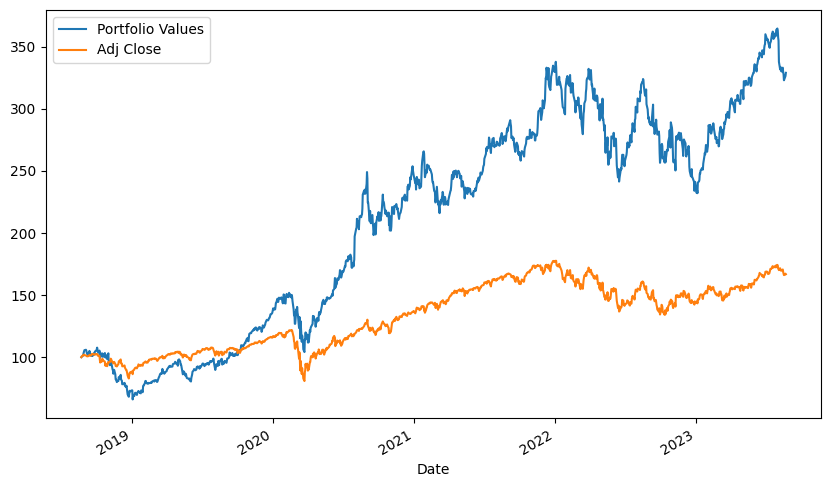

In [28]:
start_value = 100000
nd = normalize(df0)
nds = normalize(spy)
ports_allocs = nd * optimal_weights
pos_vals = ports_allocs*start_value
df0['Portfolio Values'] = pos_vals.sum(axis=1)

s1 = df0['Portfolio Values']
s2 = spy['Adj Close']

ndf= pd.concat([s1,s2],axis=1)

(ndf/ndf.iloc[0]*100).plot(figsize=(10,6))

In [29]:
df0

,AAPL,AMZN,GOOGL,META,NFLX,Portfolio Values
Date,,,,,,
2018-08-23,53.872501,95.144997,60.269001,172.899994,172.899994,100000.000000
2018-08-24,54.040001,95.269501,61.032501,174.649994,174.649994,100310.919294
2018-08-27,54.485001,96.384003,62.091000,177.460007,177.460007,101136.943689
2018-08-28,54.924999,96.640999,61.557499,176.259995,176.259995,101953.683197
2018-08-29,55.744999,99.904999,62.465000,175.899994,175.899994,103475.795564
...,...,...,...,...,...,...
2023-08-16,176.570007,135.070007,129.110001,294.290009,294.290009,327755.355186
2023-08-17,174.000000,133.979996,130.460007,285.089996,285.089996,322984.819287
2023-08-18,174.490005,133.220001,128.110001,283.250000,283.250000,323894.383519


In [30]:
for symbol in ['AAPL.csv','AMZN.csv','GOOG.csv','META.csv','NFLX.csv']:
    if symbol == 'AAPL.csv':
        d1 = get_data(symbol)
    elif symbol == 'AMZN.csv':
        d2 = get_data(symbol)
    elif symbol == 'GOOG.csv':
        d3 = get_data(symbol)
    elif symbol == 'META.csv':
        d4 = get_data(symbol)
    elif symbol == 'NFLX.csv':
        d5 = get_data(symbol) 

dict = {'AAPL':d1,
        'AMZN':d2,
        'GOOGL':d3,
        'META':d4,
        'NFLX':d4}
df1 = pd.DataFrame(dict)
df1['AAPL'] = pd.to_numeric(df0['AAPL'])
df1['AMZN'] = pd.to_numeric(df0['AMZN'])
df1['GOOGL'] = pd.to_numeric(df0['GOOGL'])
df1['META'] = pd.to_numeric(df0['META'])
df1['NFLX'] = pd.to_numeric(df0['NFLX'])


df1

,AAPL,AMZN,GOOGL,META,NFLX
Date,,,,,
2018-08-23,53.872501,95.144997,60.269001,172.899994,172.899994
2018-08-24,54.040001,95.269501,61.032501,174.649994,174.649994
2018-08-27,54.485001,96.384003,62.091000,177.460007,177.460007
2018-08-28,54.924999,96.640999,61.557499,176.259995,176.259995
2018-08-29,55.744999,99.904999,62.465000,175.899994,175.899994
...,...,...,...,...,...
2023-08-16,176.570007,135.070007,129.110001,294.290009,294.290009
2023-08-17,174.000000,133.979996,130.460007,285.089996,285.089996
2023-08-18,174.490005,133.220001,128.110001,283.250000,283.250000


<Axes: xlabel='Date'>

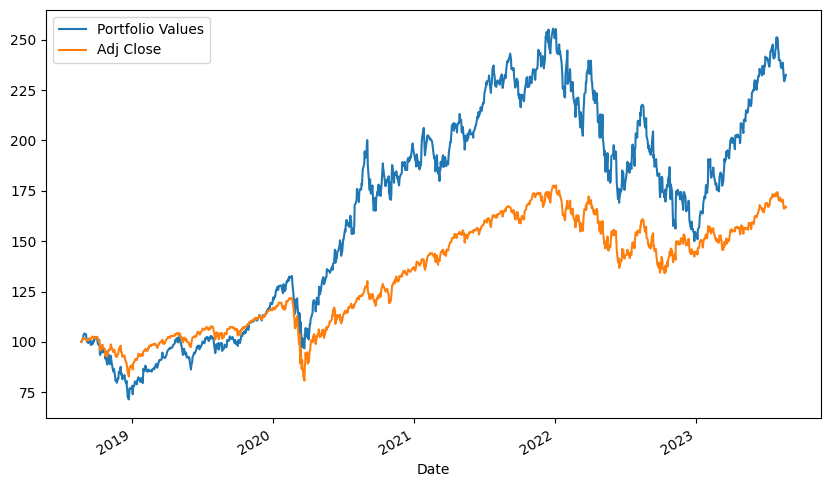

In [31]:
nd1 = normalize(df1)
ports_allocs1 = nd1 * weights
pos_vals1 = ports_allocs1*start_value
df1['Portfolio Values'] = pos_vals1.sum(axis=1)
s3 = df1['Portfolio Values']
s2 = spy['Adj Close']

ndf1= pd.concat([s3,s2],axis=1)

(ndf1/ndf1.iloc[0]*100).plot(figsize=(10,6))


In [32]:
df1

,AAPL,AMZN,GOOGL,META,NFLX,Portfolio Values
Date,,,,,,
2018-08-23,53.872501,95.144997,60.269001,172.899994,172.899994,100000.000000
2018-08-24,54.040001,95.269501,61.032501,174.649994,174.649994,100556.939226
2018-08-27,54.485001,96.384003,62.091000,177.460007,177.460007,101773.323622
2018-08-28,54.924999,96.640999,61.557499,176.259995,176.259995,101886.943100
2018-08-29,55.744999,99.904999,62.465000,175.899994,175.899994,103524.975810
...,...,...,...,...,...,...
2023-08-16,176.570007,135.070007,129.110001,294.290009,294.290009,232867.511368
2023-08-17,174.000000,133.979996,130.460007,285.089996,285.089996,229964.616277
2023-08-18,174.490005,133.220001,128.110001,283.250000,283.250000,229309.803661


In [33]:
x=df1['AAPL']
y=df1['AMZN']
z=df1['GOOGL']
a=df1['META']
b=df1['NFLX']
%pip install statsmodels


Note: you may need to restart the kernel to use updated packages.
